In [1]:
import json
import os
import pandas as pd
from collections import defaultdict
import numpy 
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore') 

In [3]:
pd.set_option('display.max_columns', None) # view all columns

In [4]:
# floats show comma separators by default
pd.options.display.float_format = '{:,}'.format

In [5]:
# not used- may delete, or keep for future analysis
def new_name(clus):
    if clus == "FL_3_30":
        return "Chatham Walk"
    elif clus == "FL_9_8":
        return "Ribbon Grass"
    elif clus == "FL_3_10":
        return "Belmont Glen"
    else:
        return clus

In [6]:
# go into data directory
cur_dir = os.getcwd()
data_dir = r"T:\Single Family\SFR\02. DATABASE\JSON\B2R JSON Clusters"

# import data from data file
os.chdir(data_dir)

dir_files = os.listdir()

# get state data
dir_files = [file for file in dir_files if "site_plan.json" in file]
dir_files

'''
# not used here, keep just in case
# focus B2R Comminity names
passed = ['FL_9_8', 'FL_3_30', 'FL_3_10']

# example input file name: 'FL_3_10__B2R_cluster_site_plan.json'
# get those of interest in passed list
files = [ file for file in dir_files if file.split('__')[0] in passed]
'''

"\n# focus B2R Comminity names\npassed = ['FL_9_8', 'FL_3_30', 'FL_3_10']\n\n# example input file name: 'FL_3_10__B2R_cluster_site_plan.json'\n# get those of interest in passed list\nfiles = [ file for file in dir_files if file.split('__')[0] in passed]\n"

In [7]:
dir_files

['AL_17_1__B2R_cluster_site_plan.json',
 'AL_17_2__B2R_cluster_site_plan.json',
 'AL_6_0__B2R_cluster_site_plan.json',
 'AL_8_0__B2R_cluster_site_plan.json',
 'AL_8_1__B2R_cluster_site_plan.json',
 'AR_17_0__B2R_cluster_site_plan.json',
 'AR_17_1__B2R_cluster_site_plan.json',
 'AZ_18_0__B2R_cluster_site_plan.json',
 'AZ_1_1__B2R_cluster_site_plan.json',
 'AZ_1_3__B2R_cluster_site_plan.json',
 'AZ_1_4__B2R_cluster_site_plan.json',
 'AZ_2_0__B2R_cluster_site_plan.json',
 'AZ_2_1__B2R_cluster_site_plan.json',
 'AZ_3_0__B2R_cluster_site_plan.json',
 'AZ_3_1__B2R_cluster_site_plan.json',
 'AZ_3_2__B2R_cluster_site_plan.json',
 'AZ_3_3__B2R_cluster_site_plan.json',
 'AZ_3_4__B2R_cluster_site_plan.json',
 'AZ_8_1__B2R_cluster_site_plan.json',
 'AZ_8_2__B2R_cluster_site_plan.json',
 'AZ_8_3__B2R_cluster_site_plan.json',
 'AZ_8_4__B2R_cluster_site_plan.json',
 'AZ_9_0__B2R_cluster_site_plan.json',
 'AZ_9_1__B2R_cluster_site_plan.json',
 'AZ_9_2__B2R_cluster_site_plan.json',
 'AZ_9_4__B2R_cluste

In [8]:
#state_file_name = dir_files[-2]

In [9]:
all_df = pd.DataFrame()

count = 0
for state_file_name in dir_files:
    # read json
    with open(state_file_name, 'r') as myfile:
            data = myfile.read()

    # parse file & turn to df
    obj = json.loads(data)
    df = pd.DataFrame(obj)
    
    # add column of cluster - to include owner
    clus = state_file_name.split('__')[0]
    df['Unique_Cluster'] = clus
    
    if count == 0:
        all_df = df
    
    # merge tables
    else:
        all_df = pd.concat([all_df,df], axis = 0)
    count += df.shape[0]
count   

3667

In [10]:
all_df = all_df.reset_index(drop=True)
all_df

,Name,CurrentObservedHouses,Rent,DateOfObservation,Bed,Baths,SQFT,Unique_Cluster
0,3 Bd 2 Bath 1613 Sqft,3,"[1545.0, 1516.43, 1595.0, 1595.0, 1595.0, 1595...","[2021-07, 2021-08, 2022-03, 2022-04, 2022-07, ...",3,2.0,"1,613.0",AL_17_1
1,3 Bd 2 Bath 1801 Sqft,4,"[1645.0, 1739.44, 1580.19, 1645.0, 1645.0, 163...","[2021-08, 2021-09, 2021-10, 2021-12, 2022-01, ...",3,2.0,"1,801.0",AL_17_1
2,3 Bd 2.5 Bath 1804 Sqft,1,"[1695.0, 1695.0]","[2022-04, 2022-05]",3,2.5,"1,804.0",AL_17_1
3,4 Bd 2 Bath 1620 Sqft,2,"[1587.86, 1595.0, 1625.0, 1583.62, 1425.0, 162...","[2021-04, 2021-05, 2021-08, 2021-09, 2021-10, ...",4,2.0,"1,620.0",AL_17_1
4,4 Bd 3 Bath 2091 Sqft,2,"[1895.0, 1875.95]","[2022-10, 2022-11]",4,3.0,"2,091.0",AL_17_1
...,...,...,...,...,...,...,...,...
3662,5 Bd 3 Bath 2592 Sqft,5,"[2580.71, 2595.0, 2595.0, 2795.0, 2795.0, 2795...","[2019-09, 2019-10, 2019-11, 2020-12, 2021-01, ...",5,3.0,2592,WA_3_5
3663,3 Bd 2.5 Bath 1697 Sqft,16,"[2362.5, 2415.62, 2795.0, 2695.0, 2695.0, 2688...","[2021-03, 2021-04, 2021-12, 2022-01, 2022-02, ...",3,2.5,1697,WA_3_6
3664,3 Bd 2.5 Bath 1471 Sqft,2,"[2350.0, 2495.0, 2495.0, 2595.0, 2680.0, 2761....","[2020-11, 2021-11, 2021-12, 2022-01, 2022-02, ...",3,2.5,1471,WA_3_7
3665,4 Bd 2.5 Bath 1931 Sqft,5,"[2575.0, 2607.43, 2650.0, 2650.0, 2750.0, 2736...","[2020-12, 2021-01, 2021-02, 2021-04, 2021-07, ...",4,2.5,1931,WA_3_7


In [11]:
# find owner from master file
# import
os.chdir(r'C:\Users\jnunez\Documents\Projects\SFR B2R Community Clustering\Data\DBSCAN')
master = pd.read_csv('b2r_master_list_final.csv')

In [12]:
master

,State,OwnerID,CLUSTERS_DBSCAN,Num_Homes,Latitude,Longitude,City,Unique_Cluster,B2R_final_check
0,NV,3,0,166,36.27067335060241,-115.12049533584336,Las Vegas,NV_3_0,True
1,NV,3,1,74,36.256842597635135,-115.12249580380067,North Las Vegas,NV_3_1,True
2,NV,3,2,13,36.236204146153845,-115.22726095384616,Las Vegas,NV_3_2,True
3,NV,3,3,134,36.04903756455224,-114.9809288432836,Henderson,NV_3_3,True
4,NV,3,4,16,36.04147956458333,-115.21303888541668,Las Vegas,NV_3_4,True
...,...,...,...,...,...,...,...,...,...
537,AR,17,1,13,36.04693216923077,-94.18092035384616,Fayetteville,AR_17_1,True
538,OR,3,0,17,45.51356446372549,-122.85169542843138,Beaverton,OR_3_0,True
539,LA,17,0,38,30.408540073684208,-91.01053451842104,Baton Rouge,LA_17_0,True
540,LA,17,1,16,30.4514677,-91.1871466,Baton Rouge,LA_17_1,True


In [13]:
merged = pd.merge(all_df, master, on='Unique_Cluster', how='outer')


In [14]:
# find name of owner from crosswalk file
# import
os.chdir(r'C:\Users\jnunez\Documents\Projects\SFR B2R Community Clustering\Cluster Analysis II')
cw = pd.read_excel('B2R - Institutional Ownership Mapping.xlsx')
cw.head(1)

,Roll-Up Name,Abbrev Name,Institutional Flag
0,Invitation Homes,INVH,1


In [15]:
cw = cw.rename({'Roll-Up Name': 'Owner Name', 'Institutional Flag': 'OwnerID'}, axis=1) 
cw

,Owner Name,Abbrev Name,OwnerID
0,Invitation Homes,INVH,1
1,Tricon,Tricon,2
2,American Homes 4 Rent,AMH,3
3,Camillo,CAM,4
4,CONREX,CNRX,5
...,...,...,...
65,VBI,VBI,10046
66,Wan Bridge,WB,10047
67,Watermark,WRMK,10048
68,Whitehaven,WHV,10049


In [16]:
merged

,Name,CurrentObservedHouses,Rent,DateOfObservation,Bed,Baths,SQFT,Unique_Cluster,State,OwnerID,CLUSTERS_DBSCAN,Num_Homes,Latitude,Longitude,City,B2R_final_check
0,3 Bd 2 Bath 1613 Sqft,3,"[1545.0, 1516.43, 1595.0, 1595.0, 1595.0, 1595...","[2021-07, 2021-08, 2022-03, 2022-04, 2022-07, ...",3,2.0,"1,613.0",AL_17_1,AL,17,1,12,33.238297116666665,-87.32304553333331,Brookwood,True
1,3 Bd 2 Bath 1801 Sqft,4,"[1645.0, 1739.44, 1580.19, 1645.0, 1645.0, 163...","[2021-08, 2021-09, 2021-10, 2021-12, 2022-01, ...",3,2.0,"1,801.0",AL_17_1,AL,17,1,12,33.238297116666665,-87.32304553333331,Brookwood,True
2,3 Bd 2.5 Bath 1804 Sqft,1,"[1695.0, 1695.0]","[2022-04, 2022-05]",3,2.5,"1,804.0",AL_17_1,AL,17,1,12,33.238297116666665,-87.32304553333331,Brookwood,True
3,4 Bd 2 Bath 1620 Sqft,2,"[1587.86, 1595.0, 1625.0, 1583.62, 1425.0, 162...","[2021-04, 2021-05, 2021-08, 2021-09, 2021-10, ...",4,2.0,"1,620.0",AL_17_1,AL,17,1,12,33.238297116666665,-87.32304553333331,Brookwood,True
4,4 Bd 3 Bath 2091 Sqft,2,"[1895.0, 1875.95]","[2022-10, 2022-11]",4,3.0,"2,091.0",AL_17_1,AL,17,1,12,33.238297116666665,-87.32304553333331,Brookwood,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,5 Bd 3 Bath 2592 Sqft,5,"[2580.71, 2595.0, 2595.0, 2795.0, 2795.0, 2795...","[2019-09, 2019-10, 2019-11, 2020-12, 2021-01, ...",5,3.0,2592,WA_3_5,WA,3,5,25,47.1948824863,-122.00415928873332,Enumclaw,True
3663,3 Bd 2.5 Bath 1697 Sqft,16,"[2362.5, 2415.62, 2795.0, 2695.0, 2695.0, 2688...","[2021-03, 2021-04, 2021-12, 2022-01, 2022-02, ...",3,2.5,1697,WA_3_6,WA,3,6,16,47.140784978125,-122.321226159375,Puyallup,True
3664,3 Bd 2.5 Bath 1471 Sqft,2,"[2350.0, 2495.0, 2495.0, 2595.0, 2680.0, 2761....","[2020-11, 2021-11, 2021-12, 2022-01, 2022-02, ...",3,2.5,1471,WA_3_7,WA,3,7,14,47.976724860714285,-122.09195343928572,Lake Stevens,True
3665,4 Bd 2.5 Bath 1931 Sqft,5,"[2575.0, 2607.43, 2650.0, 2650.0, 2750.0, 2736...","[2020-12, 2021-01, 2021-02, 2021-04, 2021-07, ...",4,2.5,1931,WA_3_7,WA,3,7,14,47.976724860714285,-122.09195343928572,Lake Stevens,True


In [17]:
merged = pd.merge(merged, cw, on='OwnerID', how='outer')

In [18]:
merged.columns

Index(['Name', 'CurrentObservedHouses', 'Rent', 'DateOfObservation', 'Bed',
       'Baths', 'SQFT', 'Unique_Cluster', 'State', 'OwnerID',
       'CLUSTERS_DBSCAN', 'Num_Homes', 'Latitude', 'Longitude', 'City',
       'B2R_final_check', 'Owner Name', 'Abbrev Name'],
      dtype='object')

In [19]:
to_drop = ['CurrentObservedHouses', 'Num_Homes','B2R_final_check', 'OwnerID']

In [20]:
merged = merged.drop(to_drop, axis = 1)

In [21]:
merged = merged.rename({'Owner Name': 'OwnerID'}, axis=1)  

In [22]:
merged = merged[merged['Name'].notna()] # drop rows that contain owner names that didn't match
merged

,Name,Rent,DateOfObservation,Bed,Baths,SQFT,Unique_Cluster,State,CLUSTERS_DBSCAN,Latitude,Longitude,City,OwnerID,Abbrev Name
0,3 Bd 2 Bath 1613 Sqft,"[1545.0, 1516.43, 1595.0, 1595.0, 1595.0, 1595...","[2021-07, 2021-08, 2022-03, 2022-04, 2022-07, ...",3.0,2.0,"1,613.0",AL_17_1,AL,1.0,33.238297116666665,-87.32304553333331,Brookwood,Kairos,Kairos
1,3 Bd 2 Bath 1801 Sqft,"[1645.0, 1739.44, 1580.19, 1645.0, 1645.0, 163...","[2021-08, 2021-09, 2021-10, 2021-12, 2022-01, ...",3.0,2.0,"1,801.0",AL_17_1,AL,1.0,33.238297116666665,-87.32304553333331,Brookwood,Kairos,Kairos
2,3 Bd 2.5 Bath 1804 Sqft,"[1695.0, 1695.0]","[2022-04, 2022-05]",3.0,2.5,"1,804.0",AL_17_1,AL,1.0,33.238297116666665,-87.32304553333331,Brookwood,Kairos,Kairos
3,4 Bd 2 Bath 1620 Sqft,"[1587.86, 1595.0, 1625.0, 1583.62, 1425.0, 162...","[2021-04, 2021-05, 2021-08, 2021-09, 2021-10, ...",4.0,2.0,"1,620.0",AL_17_1,AL,1.0,33.238297116666665,-87.32304553333331,Brookwood,Kairos,Kairos
4,4 Bd 3 Bath 2091 Sqft,"[1895.0, 1875.95]","[2022-10, 2022-11]",4.0,3.0,"2,091.0",AL_17_1,AL,1.0,33.238297116666665,-87.32304553333331,Brookwood,Kairos,Kairos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,3 Bd [] Bath 1184 Sqft,"[1398.2, 1395.0]","[2019-07, 2019-08]",3.0,[],1184,UT_14_1,UT,1.0,40.48027146052866,-111.9827466401014,Herriman,MAXXPM,MXPM
3663,1 Bd 1 Bath 772 Sqft,"[995.0, 995.0, 1245.0, 1245.0, 1196.39, 1005.0]","[2019-08, 2019-09, 2019-10, 2019-11, 2019-12, ...",1.0,1.0,772,UT_14_3,UT,3.0,40.366233533333336,-111.77913214,American Fork,MAXXPM,MXPM
3664,2 Bd 1 Bath 902 Sqft,"[1100.0, 1115.0]","[2019-12, 2020-03]",2.0,1.0,902,UT_14_3,UT,3.0,40.366233533333336,-111.77913214,American Fork,MAXXPM,MXPM
3665,3 Bd 2 Bath 1356 Sqft,"[1260.38, 1228.7, 1209.82, 1245.0, 1220.0, 122...","[2019-07, 2019-08, 2019-09, 2019-10, 2019-11, ...",3.0,2.0,1356,UT_14_3,UT,3.0,40.366233533333336,-111.77913214,American Fork,MAXXPM,MXPM


In [23]:
expldd = merged.explode(['Rent', 'DateOfObservation'])

In [24]:
expldd = expldd.reset_index(drop = True)
expldd['Count'] = 1


In [25]:
# has humongous bedroom counts -> clean
expldd['Bed'].unique()


array([3.00000e+00, 4.00000e+00, 2.00000e+00, 5.00000e+00, 3.01204e+05,
       1.66500e+03, 1.00000e+00, 6.00000e+00])

In [26]:
expldd = expldd.loc[expldd['Bed'].isin([2,3,4,5])]

In [27]:
# has humongous bedroom counts -> clean
expldd['Bed'].unique()


array([3., 4., 2., 5.])

In [28]:
# has empty lists -> remove
expldd['Baths'].tolist()
expldd.Baths = expldd.Baths.apply(lambda y: np.nan if type(y)==list else y)

#  check
expldd['Baths'].unique()


array([2.  , 2.5 , 3.  , 3.5 , 4.5 ,  nan, 4.  , 1.  , 2.9 , 3.25, 0.5 ,
       1.5 ])

In [29]:
expldd = expldd.loc[expldd['Baths'] <= 15]

In [30]:
expldd['OwnerID'].unique()

array(['Kairos', 'FirstKey', 'Main Street Renewal', 'On Q',
       'Invitation Homes', 'Tricon', 'American Homes 4 Rent', 'Progress',
       'ResiBuilt', nan, 'RENU Management', 'CBH Homes', 'CONREX',
       'Streetlane', 'Ameritex', 'Camillo', 'MAXXPM'], dtype=object)

In [31]:
foc_com = ['American Homes 4 Rent', 'Camillo', 'Invitation Homes', 'Main Street Renewal', 'Progress', 'ResiBuilt']
expldd = expldd.loc[expldd['OwnerID'].isin(foc_com)]

In [32]:
#  check
expldd['Baths'].unique()

array([2.  , 2.5 , 3.  , 3.5 , 4.  , 4.5 , 1.  , 2.9 , 3.25, 1.5 ])

In [33]:
expldd.head(2)

,Name,Rent,DateOfObservation,Bed,Baths,SQFT,Unique_Cluster,State,CLUSTERS_DBSCAN,Latitude,Longitude,City,OwnerID,Abbrev Name,Count
1342,3 Bd 2 Bath 1501 Sqft,"1,545.0",2022-10,3.0,2.0,"1,501.0",AL_8_0,AL,0.0,33.3876578831456,-86.77917384270833,Birmingham,Main Street Renewal,MSR,1
1343,3 Bd 2 Bath 1573 Sqft,"1,845.0",2021-03,3.0,2.0,"1,573.0",AL_8_0,AL,0.0,33.3876578831456,-86.77917384270833,Birmingham,Main Street Renewal,MSR,1


In [34]:
expldd.shape

(23468, 15)

<AxesSubplot:>

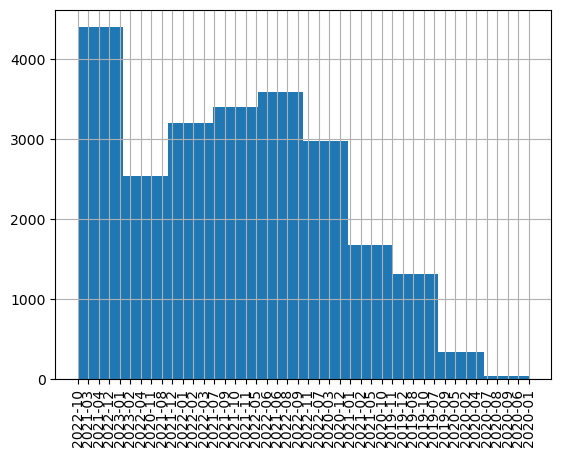

In [35]:
expldd.DateOfObservation.hist(xrot = 90)


In [36]:
# save files here
os.chdir(r"C:\Users\jnunez\Documents\Projects\SFR B2R Community Clustering\Cluster Analysis II\Output")

In [37]:
avg_sqft_per_owner = expldd.groupby(['OwnerID', 'Bed']).agg({'Count': ['sum'], 'SQFT': ['mean', 'median']}).round(2)

avg_sqft_per_owner = avg_sqft_per_owner.droplevel(0, axis = 1)
avg_sqft_per_owner = avg_sqft_per_owner.rename({'sum': '# Homes with Bed-Category',
                                                 'mean': 'Avg Sqft',
                                                 'median': 'Median Sqft'
                                                 }, axis=1) 
avg_sqft_per_owner.index.set_names(["Owner ID", "# Bedrooms"], inplace=True)
avg_sqft_per_owner.to_excel('Average_SQFT_per_Owner.xlsx', index = True)
avg_sqft_per_owner

# Homes with Bed-Category  Avg Sqft  \
Owner ID              # Bedrooms                                        
American Homes 4 Rent 2.0                               189  1,267.35   
                      3.0                              2556  1,719.26   
                      4.0                              3658  2,138.25   
                      5.0                              1159  2,575.09   
Camillo               2.0                                87  1,288.21   
                      3.0                              4126   1,520.5   
                      4.0                              3270  1,845.26   
Invitation Homes      2.0                                 5   1,838.0   
                      3.0                               196  1,635.29   
                      4.0                               206  2,129.45   
                      5.0                                35  2,575.46   
Main Street Renewal   2.0                                88  1,208.45   
                      3.0                              1392  1,568.73   
                      4.0                               915  2,016.49   
                      5.0                               174  2,323.84   
Progress              2.0                                74  1,502.59   
                      3.0                              2341  1,647.29   
                      4.0                              1603  2,035.97   
                      5.0                               213  2,644.34   
ResiBuilt             2.0                                29  1,380.79   
                      3.0                               615  1,661.74   
                      4.0                               436  1,963.33   
                      5.0                               101  2,368.41   

                                  Median Sqft  
Owner ID              # Bedrooms               
American Homes 4 Rent 2.0             1,248.0  
                      3.0             1,721.0  
                      4.0             2,173.0  
                      5.0             2,543.0  
Camillo               2.0             1,050.0  
                      3.0             1,425.0  
                      4.0             1,858.0  
Invitation Homes      2.0             1,838.0  
                      3.0             1,602.0  
                      4.0             2,209.0  
                      5.0             2,429.0  
Main Street Renewal   2.0             1,122.0  
                      3.0             1,552.0  
                      4.0             1,942.0  
                      5.0             2,355.0  
Progress              2.0             1,414.5  
                      3.0             1,577.0  
                      4.0             2,095.0  
                      5.0             2,688.0  
ResiBuilt             2.0             1,424.0  
                      3.0             1,712.0  
                      4.0             1,870.0  
                      5.0             2,389.0

In [38]:
avg_sqft_per_owner3 = avg_sqft_per_owner[avg_sqft_per_owner.index.get_level_values(1) == 3]
avg_sqft_per_owner3

,,# Homes with Bed-Category,Avg Sqft,Median Sqft
Owner ID,# Bedrooms,,,
American Homes 4 Rent,3.0,2556,"1,719.26","1,721.0"
Camillo,3.0,4126,"1,520.5","1,425.0"
Invitation Homes,3.0,196,"1,635.29","1,602.0"
Main Street Renewal,3.0,1392,"1,568.73","1,552.0"
Progress,3.0,2341,"1,647.29","1,577.0"
ResiBuilt,3.0,615,"1,661.74","1,712.0"


In [39]:
avg_sqft_per_owner3

,,# Homes with Bed-Category,Avg Sqft,Median Sqft
Owner ID,# Bedrooms,,,
American Homes 4 Rent,3.0,2556,"1,719.26","1,721.0"
Camillo,3.0,4126,"1,520.5","1,425.0"
Invitation Homes,3.0,196,"1,635.29","1,602.0"
Main Street Renewal,3.0,1392,"1,568.73","1,552.0"
Progress,3.0,2341,"1,647.29","1,577.0"
ResiBuilt,3.0,615,"1,661.74","1,712.0"


In [40]:
avg_sqft_per_owner3.to_excel('Average_SQFT_per_Owner_3Bed.xlsx', index = True)

In [41]:
avg_sqft_per_owner4 = avg_sqft_per_owner[avg_sqft_per_owner.index.get_level_values(1) == 4]
avg_sqft_per_owner4

,,# Homes with Bed-Category,Avg Sqft,Median Sqft
Owner ID,# Bedrooms,,,
American Homes 4 Rent,4.0,3658,"2,138.25","2,173.0"
Camillo,4.0,3270,"1,845.26","1,858.0"
Invitation Homes,4.0,206,"2,129.45","2,209.0"
Main Street Renewal,4.0,915,"2,016.49","1,942.0"
Progress,4.0,1603,"2,035.97","2,095.0"
ResiBuilt,4.0,436,"1,963.33","1,870.0"


In [42]:
avg_sqft_per_owner4.to_excel('Average_SQFT_per_Owner_4Bed.xlsx', index = True)

In [43]:
# only interested in results with input after 12/01/2022
expldd_time = expldd.loc[expldd['DateOfObservation'] > '2022-12']

<AxesSubplot:>

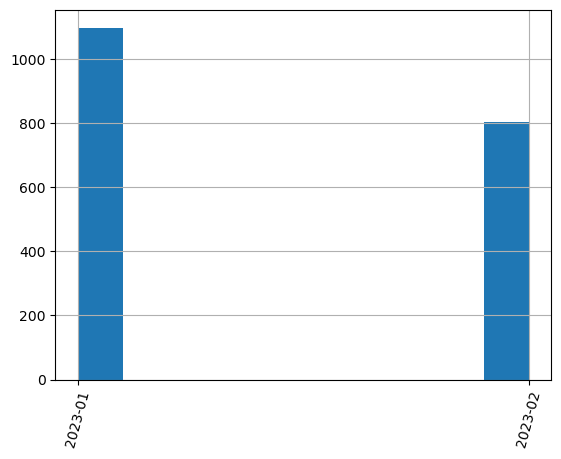

In [44]:
expldd_time.DateOfObservation.hist(xrot = 75)


In [45]:
expldd_time34 = expldd_time.loc[expldd_time['Bed'].isin([3,4])]
expldd_time34['Bed'].unique()

array([3., 4.])

In [46]:
norm_price = expldd_time34.groupby(['OwnerID', 'Bed']).agg({'Count': ['sum'], 'Rent': ['mean'], 'SQFT': ['mean'],})
norm_price = norm_price.droplevel(1, axis = 1)
norm_price['$/SQFT'] = norm_price['Rent'] / norm_price['SQFT']
norm_price = norm_price.round(2)

In [47]:
norm_price.index

MultiIndex([('American Homes 4 Rent', 3.0),
            ('American Homes 4 Rent', 4.0),
            (              'Camillo', 3.0),
            (              'Camillo', 4.0),
            (     'Invitation Homes', 3.0),
            (     'Invitation Homes', 4.0),
            (  'Main Street Renewal', 3.0),
            (  'Main Street Renewal', 4.0),
            (             'Progress', 3.0),
            (             'Progress', 4.0),
            (            'ResiBuilt', 3.0),
            (            'ResiBuilt', 4.0)],
           names=['OwnerID', 'Bed'])

In [48]:
norm_price = norm_price.rename({'Count': '# Homes with Bed-Category',
                                                 }, axis=1) 
norm_price.index.set_names(["Owner ID", "# Bedrooms"], inplace=True)
norm_price.to_excel('Price_perSQFT_perOwner_after2022.xlsx', index = True)

# Problem 3

In [49]:
# same as above

In [50]:
avg_sqft_per_state = expldd.groupby(['State', 'Bed']).agg({'Count': ['sum'], 'SQFT': ['mean', 'median']}).round(2)
avg_sqft_per_state = avg_sqft_per_state.droplevel(0, axis = 1)

avg_sqft_per_state = avg_sqft_per_state.rename({'sum': '# Homes with Bed-Category',
                                                 'mean': 'Avg Sqft',
                                                 'median': 'Median Sqft'
                                                 }, axis=1) 
avg_sqft_per_state.index.set_names(["State", "# Bedrooms"], inplace=True)
avg_sqft_per_state.to_excel('Average_SQFT_per_State.xlsx', index = True)
avg_sqft_per_state

# Homes with Bed-Category  Avg Sqft  Median Sqft
State # Bedrooms                                                  
AL    3.0                                82  1,953.62      1,689.0
      4.0                               109  2,314.39      2,396.0
      5.0                                 4   2,124.5      2,179.0
AZ    2.0                                21   1,241.0      1,241.0
      3.0                               434  1,660.66      1,670.0
...                                     ...       ...          ...
UT    4.0                               272  2,217.83      2,256.0
      5.0                               207  2,762.39      2,749.0
WA    3.0                                57  1,707.23      1,697.0
      4.0                               188  2,041.23      2,156.0
      5.0                                59  2,347.53      2,124.0

[65 rows x 3 columns]

In [51]:
avg_sqft_per_state3 = avg_sqft_per_state[avg_sqft_per_state.index.get_level_values(1) == 3]
avg_sqft_per_state3

,,# Homes with Bed-Category,Avg Sqft,Median Sqft
State,# Bedrooms,,,
AL,3.0,82,"1,953.62","1,689.0"
AZ,3.0,434,"1,660.66","1,670.0"
CO,3.0,69,"1,930.1","1,932.0"
FL,3.0,1364,"1,658.92","1,641.0"
GA,3.0,697,"1,871.31","1,855.0"
ID,3.0,74,"1,724.23","1,721.0"
IN,3.0,16,"1,760.0","1,760.0"
KY,3.0,81,"1,517.84","1,484.0"
MD,3.0,20,"1,792.5","1,728.0"


In [52]:
avg_sqft_per_state3.to_excel('Average_SQFT_per_State_3Bed.xlsx', index = True)

In [53]:
avg_sqft_per_state4 = avg_sqft_per_state[avg_sqft_per_state.index.get_level_values(1) == 4]
avg_sqft_per_state4

,,# Homes with Bed-Category,Avg Sqft,Median Sqft
State,# Bedrooms,,,
AL,4.0,109,"2,314.39","2,396.0"
AZ,4.0,210,"2,072.78","2,027.0"
CO,4.0,22,NaN,NaN
FL,4.0,1360,"2,076.7","2,078.0"
GA,4.0,1147,"2,210.46","2,266.0"
ID,4.0,157,"2,140.08","2,198.0"
KY,4.0,26,"2,182.65","1,880.0"
MD,4.0,13,"2,231.85","2,355.0"
MO,4.0,189,"1,977.53","1,942.0"


In [54]:
avg_sqft_per_owner4.to_excel('Average_SQFT_per_State_4Bed.xlsx', index = True)

In [55]:
norm_price = expldd_time34.groupby(['State', 'Bed']).agg({'Count': ['sum'], 'Rent': ['mean'], 'SQFT': ['mean'],})
norm_price = norm_price.droplevel(1, axis = 1)
norm_price['$/SQFT'] = norm_price['Rent'] / norm_price['SQFT']
norm_price = norm_price.round(2)
norm_price = norm_price.rename({'Count': '# Homes with Bed-Category',
                                                 }, axis=1) 
norm_price.index.set_names(["State", "# Bedrooms"], inplace=True)
norm_price.to_excel('Price_perSQFT_perState_after2022.xlsx', index = True)
norm_price

# Homes with Bed-Category     Rent     SQFT  $/SQFT
State # Bedrooms                                                     
AL    3.0                                 5 1,774.55  1,953.8    0.91
      4.0                                10 2,224.91  2,327.3    0.96
AZ    3.0                                39  2,069.1 1,686.27    1.23
      4.0                                22  2,281.8 2,097.63    1.09
CO    3.0                                 9 2,582.42  1,890.0    1.37
      4.0                                 3 2,631.18      NaN     NaN
FL    3.0                               150 2,115.38 1,689.72    1.25
      4.0                               125 2,363.29 2,038.24    1.16
GA    3.0                                69  2,372.6 1,878.44    1.26
      4.0                                84 2,303.25 2,184.26    1.05
ID    3.0                                 9 2,186.11 1,779.56    1.23
      4.0                                20 2,368.29  2,156.1     1.1
IN    3.0                                 4  2,020.1  1,760.0    1.15
KY    3.0                                 8 1,736.87 1,543.88    1.13
      4.0                                 4 2,028.35  2,228.0    0.91
MD    3.0                                 2 3,214.38  1,728.0    1.86
      4.0                                 2 3,419.65  2,149.0    1.59
MN    3.0                                 2  2,267.5  1,748.0     1.3
MO    3.0                                10 1,636.67  1,674.0    0.98
      4.0                                15 2,036.93  2,018.8    1.01
MS    3.0                                 3 1,875.19  1,433.0    1.31
NC    3.0                                55 2,118.99 1,847.17    1.15
      4.0                                45 2,239.49 2,271.53    0.99
NV    3.0                                17 2,037.99 1,786.18    1.14
      4.0                                18 2,276.21 2,103.06    1.08
OK    3.0                                28  1,721.0 1,558.29     1.1
      4.0                                13 1,851.88 1,523.55    1.22
OR    4.0                                 1  2,395.0  1,485.0    1.61
SC    3.0                                32 1,951.42 1,663.43    1.17
      4.0                                29  2,153.8 1,960.95     1.1
TN    3.0                                24 2,072.14 1,784.39    1.16
      4.0                                25 2,290.27 2,209.12    1.04
TX    3.0                               429  1,799.7 1,524.04    1.18
      4.0                               349 1,968.58 1,890.39    1.04
UT    3.0                                 5 2,008.81  1,646.8    1.22
      4.0                                23 2,433.08 2,244.05    1.08
WA    3.0                                 6  2,537.5  1,516.0    1.67
      4.0                                10 2,779.81  1,971.4    1.41

# Problem 4

In [56]:
expldd.head(1)

,Name,Rent,DateOfObservation,Bed,Baths,SQFT,Unique_Cluster,State,CLUSTERS_DBSCAN,Latitude,Longitude,City,OwnerID,Abbrev Name,Count
1342,3 Bd 2 Bath 1501 Sqft,"1,545.0",2022-10,3.0,2.0,"1,501.0",AL_8_0,AL,0.0,33.3876578831456,-86.77917384270833,Birmingham,Main Street Renewal,MSR,1


In [57]:
pop = expldd.groupby(['OwnerID', 'Name']).agg({'Count': ['sum']}).round(2)
pop = pop.droplevel(1, axis = 1)
pop = pop.rename({'Count': '# Homes with Floor Plan'}, axis=1) 
pop.index.set_names(["Owner ID", "Floor Plan"], inplace=True)

pop.to_excel('Popular_FloorPlans_perOwner.xlsx', index = True)
pop

# Homes with Bed-Category
Owner ID              Floor Plan                                        
American Homes 4 Rent 2 Bd 1 Bath 1200 Sqft                           13
                      2 Bd 2 Bath 1100 Sqft                            1
                      2 Bd 2 Bath 1235 Sqft                            7
                      2 Bd 2 Bath 1240 Sqft                           16
                      2 Bd 2 Bath 1248 Sqft                            9
...                                                                  ...
ResiBuilt             5 Bd 2.5 Bath 2896 Sqft                          4
                      5 Bd 2.5 Bath None Sqft                         18
                      5 Bd 3 Bath 2558 Sqft                            4
                      5 Bd 3 Bath 2577 Sqft                            4
                      5 Bd 3 Bath 2587 Sqft                            1

[1303 rows x 1 columns]

# Problem 5

In [58]:
pop1 = expldd.groupby(['Unique_Cluster', 'Bed']).agg({'Count': ['sum']}).round(2)
pop1 = pop1.droplevel(1, axis = 1)
pop1 = pop1.rename({'Count': '# Homes with Bed-Category',
                                                 }, axis=1)
pop1.index.set_names(["Community", "# Bedrooms"], inplace=True)

pop1

# Homes with Bed-Category
Community # Bedrooms                           
AL_8_0    3.0                                41
          4.0                                84
          5.0                                 4
AL_8_1    3.0                                41
          4.0                                25
...                                         ...
WA_3_5    4.0                                49
          5.0                                17
WA_3_6    3.0                                 7
WA_3_7    3.0                                 8
          4.0                                32

[922 rows x 1 columns]

In [59]:
pop1.to_excel('BedCount_perCommunity.xlsx', index = True)

# Problem 6

In [60]:
pop2 = expldd.groupby(['State', 'Bed']).agg({'Count': ['sum']}).round(2)
pop2 = pop2.droplevel(1, axis = 1)
pop2 = pop2.rename({'Count': '# Homes with Bed-Category',
                                                 }, axis=1)
pop2.index.set_names(["State", "# Bedrooms"], inplace=True)
pop2

# Homes with Bed-Category
State # Bedrooms                           
AL    3.0                                82
      4.0                               109
      5.0                                 4
AZ    2.0                                21
      3.0                               434
...                                     ...
UT    4.0                               272
      5.0                               207
WA    3.0                                57
      4.0                               188
      5.0                                59

[65 rows x 1 columns]

In [61]:
pop2.to_excel('BedCount_perState.xlsx', index = True)

In [62]:
pop2.groupby(['# Bedrooms']).agg({'# Homes with Bed-Category': ['sum']}).droplevel(1, axis = 1)


,# Homes with Bed-Category
# Bedrooms,
2.0,472
3.0,11226
4.0,10088
5.0,1682


In [63]:
pop3 = pop1[pop1.index.get_level_values(1).isin([3,4])]
pop3

# Homes with Bed-Category
Community # Bedrooms                           
AL_8_0    3.0                                41
          4.0                                84
AL_8_1    3.0                                41
          4.0                                25
AZ_1_1    3.0                                45
...                                         ...
WA_3_5    3.0                                 2
          4.0                                49
WA_3_6    3.0                                 7
WA_3_7    3.0                                 8
          4.0                                32

[747 rows x 1 columns]

In [64]:
bed_perc = pop3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(2)
bed_perc

# Homes with Bed-Category
Community # Bedrooms                           
AL_8_0    3.0                              32.8
          4.0                              67.2
AL_8_1    3.0                             62.12
          4.0                             37.88
AZ_1_1    3.0                             83.33
...                                         ...
WA_3_5    3.0                              3.92
          4.0                             96.08
WA_3_6    3.0                             100.0
WA_3_7    3.0                              20.0
          4.0                              80.0

[747 rows x 1 columns]

In [65]:
bed_perc = bed_perc.loc[bed_perc['# Homes with Bed-Category'] != 100]

In [66]:
bed_perc[bed_perc.index.get_level_values(1).isin([3])].mean()


# Homes with Bed-Category   49.05547400611621
dtype: float64

In [67]:
bed_perc[bed_perc.index.get_level_values(1).isin([4])].mean()


# Homes with Bed-Category   50.94452599388381
dtype: float64

In [68]:
bed_perc.to_excel('34BedPercentage_perCommunity.xlsx', index = True)